# Portfolio Optimization

“A Teoria Moderna de Portfólio (MPT), uma hipótese apresentada por Harry Markowitz em seu artigo  “Portfolio Selection,” (publicado em 1952 pelo Journal of Finance) é uma teoria de investimento baseada na ideia de que investidores avessos ao risco podem construir carteiras para otimizar ou maximizar o retorno esperado com base em um determinado nível de risco de mercado, enfatizando que o risco é uma parte inerente de uma recompensa mais elevada. É uma das teorias econômicas mais importantes e influentes que tratam de finanças e investimentos.

## Monte Carlo Simulation for Optimization Search


We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [4]:
# https://medium.com/turing-talks/an%C3%A1lise-de-um-portf%C3%B3lio-de-a%C3%A7%C3%B5es-em-python-1a5e0b3455fc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import yfinance as yf

In [5]:
# Download and get Daily Returns
# nestes arquivos estao somente as datas e o close. Date,Adj. Close. AAPL_CLOSE é o nome do arquivo.
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)
# 2012-01-03 a 2016-12-30

In [6]:
#start = pd.to_datetime('2012-01-01')
#end = pd.to_datetime('2017-01-01')  # não tem negociação nesse dia

In [7]:
#aapl =  yf.download("AAPL", start, end)
#msft =  yf.download("MSFT", start, end)
#ibm =  yf.download("IBM", start, end)
#amzn =  yf.download("AMZN", start, end)

In [8]:
print(aapl.count())
print(cisco.count())
print(ibm.count())
print(amzn.count())

Adj. Close    1258
dtype: int64
Adj. Close    1258
dtype: int64
Adj. Close    1258
dtype: int64
Adj. Close    1258
dtype: int64


In [9]:
# concatenação por colunas
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [10]:
stocks.tail()

,aapl,cisco,ibm,amzn
Date,,,,
2016-12-23,115.547742,29.730928,163.790152,760.59
2016-12-27,116.281568,29.877002,164.212620,771.40
2016-12-28,115.785740,29.623807,163.279259,772.13
2016-12-29,115.755990,29.662760,163.682078,765.15
2016-12-30,114.853583,29.429042,163.082762,749.87


In [11]:
stocks.pct_change(1)

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178
...,...,...,...,...
2016-12-23,0.001978,0.002298,-0.002095,-0.007503
2016-12-27,0.006351,0.004913,0.002579,0.014213
2016-12-28,-0.004264,-0.008475,-0.005684,0.000946


In [12]:
# sem alocação, somente os preços. Média dos retornos para todo o período, para cada ação.
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [13]:
round(stocks.pct_change(1).corr(),2)

,aapl,cisco,ibm,amzn
aapl,1.00,0.30,0.30,0.24
cisco,0.30,1.00,0.42,0.28
ibm,0.30,0.42,1.00,0.26
amzn,0.24,0.28,0.26,1.00


# Simulating Thousands of Possible Allocations

In [15]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


<Axes: xlabel='Date'>

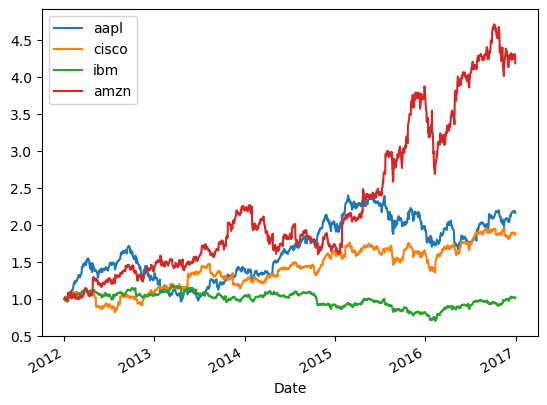

In [16]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [17]:
stock_normed.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.005374,1.019324,0.995921,0.991510
2012-01-05,1.016536,1.015566,0.991197,0.992068
2012-01-06,1.027162,1.011809,0.979817,1.019997
2012-01-09,1.025533,1.018250,0.974718,0.997375


In [18]:
# calcula para todas as acoes, individualmente, sem alocação.
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


## Log Returns vs Arithmetic Returns

Agora passaremos a usar retornos de log em vez de retornos aritméticos, para muitos de nossos casos de uso eles são quase os mesmos, mas a maioria das análises técnicas exigem redução de tendência/normalização da série temporal e usar retornos de log é uma ótima maneira de fazer isso.
Os retornos de log são convenientes para trabalhar em muitos dos algoritmos que encontraremos.

Para uma análise completa de por que usamos retornos de log, consulte [este excelente artigo](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).


In [20]:
# log da razao dos precos das acoes. Ao inves de usar o change usa o shift e tira o log. Quase igual
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


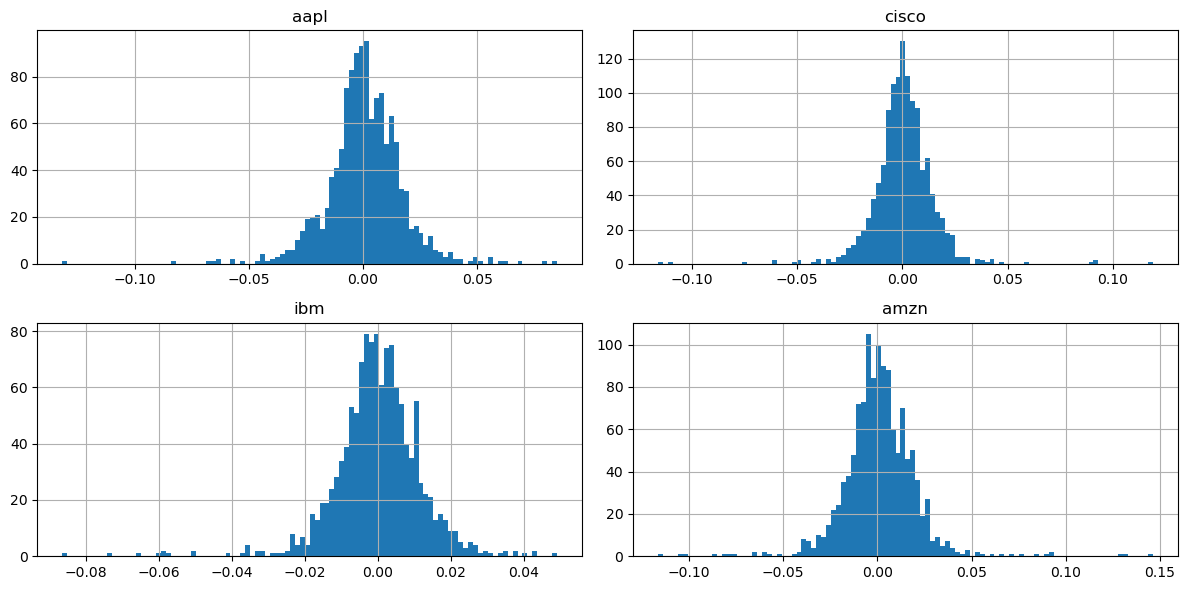

In [21]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [22]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [23]:
# sem o log, somente o change
stock_daily_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000750,0.016434,-0.123549,-0.007331,0.000455,0.009772,0.088741
cisco,1257.0,0.000599,0.014301,-0.109606,-0.006221,0.000213,0.007663,0.126214
ibm,1257.0,0.000081,0.011755,-0.082790,-0.005856,0.000049,0.006498,0.050357
amzn,1257.0,0.001328,0.019498,-0.109972,-0.008498,0.000563,0.011472,0.157457


In [24]:
# retorno anual sem log
stock_daily_ret.mean() * 252

aapl     0.188942
cisco    0.151013
ibm      0.020310
amzn     0.334730
dtype: float64

In [25]:
# retorno anual
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [26]:
# Compute pairwise covariance of columns. Mostra apenas a direção da relação.
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [28]:
round(log_ret.cov()*252,4) # multiply by days

,aapl,cisco,ibm,amzn
aapl,0.0683,0.0179,0.0145,0.0190
cisco,0.0179,0.0514,0.0180,0.0200
ibm,0.0145,0.0180,0.0352,0.0149
amzn,0.0190,0.0200,0.0149,0.0945


In [29]:
# padroniza a covariância e mede a intensidade da relação.[-1,+1]
round(log_ret.corr(),4)

,aapl,cisco,ibm,amzn
aapl,1.0000,0.3013,0.2949,0.2363
cisco,0.3013,1.0000,0.4239,0.2864
ibm,0.2949,0.4239,1.0000,0.2591
amzn,0.2363,0.2864,0.2591,1.0000


In [30]:
# ATÉ AQUI SEM ALOCAÇÃO, SOMENTE VARIAÇOES DE PREÇOS

## Single Run for Some Random Allocation

In [32]:
# Set seed (optional). garante que gere a maior quantidade de números aleatórios
# NumPy.Random.Seed (101) Explained - Medium. 101 valor arbitrário
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')




In [33]:
# Create Random Weights
print('Creating Random Weights')
weights = np.around(np.array(np.random.random(4)),2)
print(weights)
print('\n')

Creating Random Weights
[0.52 0.57 0.03 0.17]




In [34]:
# Rebalance Weights. Normalização
print('Rebalance to sum to 1.0')
weights = np.around(weights / np.sum(weights),2)
print(weights)
print('\n')

Rebalance to sum to 1.0
[0.4  0.44 0.02 0.13]




In [35]:
# Expected Return
print('Expected Portfolio Return')
# fez o produto dos pesos pela média do retorno de cada acao, soma e multiplica pelo n. de dias em uma ano
exp_ret = np.around(np.sum(log_ret.mean() * weights) *252,2)
print(exp_ret)
print('\n')

Expected Portfolio Return
0.15




$Volatilidade (anualizada) = \sqrt{ w^T \cdot log(Cov) \cdot 252\cdot w }$ 

In [37]:
# Expected Variance
print('Expected Volatility')
# raiz quadrada do produto dos pesos pelo log da covariancia
exp_vol = np.around(np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights))),2)
print(exp_vol)
print('\n')

Expected Volatility
0.18




In [38]:
# Sharpe Ratio
SR = np.around(exp_ret/exp_vol,2)
print('Sharpe Ratio')
print(SR)

Sharpe Ratio
0.83


Agora fazendo essa operação muitas vezes:

In [40]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(len(stocks.columns)))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return. Agora são vetores.
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance. Vetor também.
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [41]:
max_sr_MC = round(sharpe_arr.max(),3)
max_sr_MC

1.03

In [42]:
sharpe_arr.argmax()

1419

In [43]:
np.around(all_weights[sharpe_arr.argmax(),:],2)

array([0.26, 0.21, 0.  , 0.53])

In [44]:
max_sr_ret_MC = ret_arr[sharpe_arr.argmax()]
print('Retorno do max SR :')
print(round(max_sr_ret_MC,2))



Retorno do max SR :
0.22


In [45]:
max_sr_vol_MC = vol_arr[sharpe_arr.argmax()]
print('Volatilide do max SR:')
print(round(max_sr_vol_MC,2))

Volatilide do max SR:
0.21


## Plotting the data

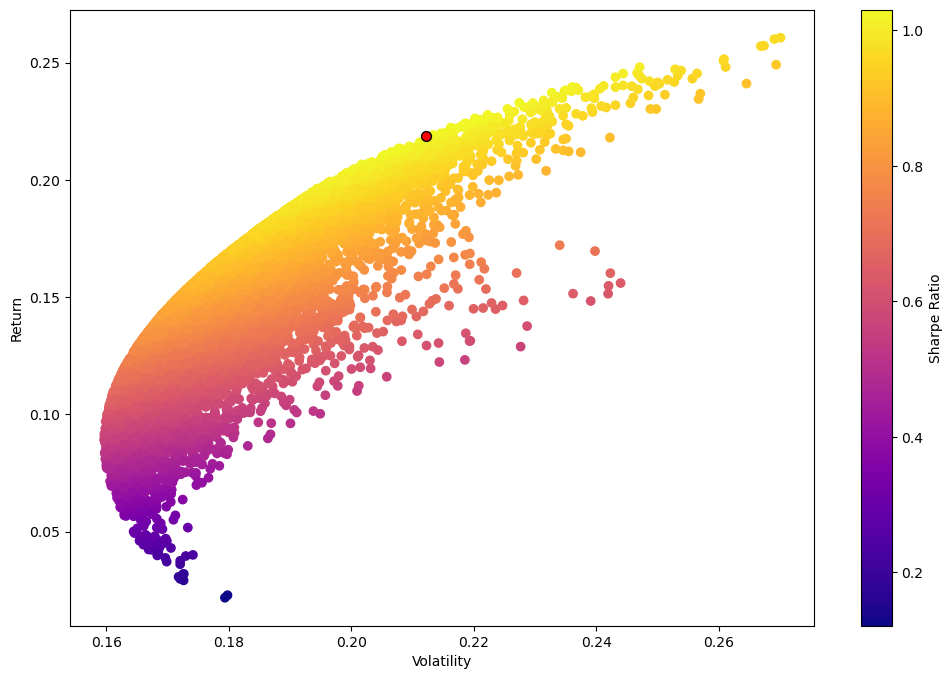

In [47]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol_MC,max_sr_ret_MC,c='red',s=50,edgecolors='black')

# Otimização Matemática do Sharpe Ratio
Existem maneiras muito melhores de encontrar bons pesos de alocação do que apenas adivinhar e verificar. Por isso, serão utilizadas funções de otimização para encontrar matematicamente os pesos ideais. O objetivo é maximizar o Sharpe Ratio.

### Functionalize Return and SR operations

In [50]:
# essa é a função que contém o SR para ser maximizado.
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio. 
    Retorna um vetor de 3 posicoes, 0,1,2
    0 - return
    1 - volatility
    2 - sr
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [51]:
from scipy.optimize import minimize

To fully understand all the parameters, check out:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [53]:
help(minimize)
# opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
# By convention of minimize function it should be a function that returns zero for conditions
# cons = ({'type':'eq','fun': check_sum})
# Constraint type: 'eq' for equality, 'ineq' for inequality.
# fun : callable, the function defining the constraint.

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

A otimização será feita com uma função de minimização, apesar de querermos maximizar o índice de Sharpe. Para isso precisaremos torná-lo negativo para que possamos minimizar o sharpe negativo (o mesmo que maximizar o sharpe positivo)

In [55]:
# somente troca o sinal da função do SR. Função a ser minimizada.
# retornando o SR, que está na posicao 2 do vetor de retorno. Por isso precisa trocar o sinal. 
#Queremos o maximo mas ele procura o mínimo, entao temos de inverter.
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [56]:
# Constraints (restrições, condições de contorno)
# Equality constraint means that the constraint function result is to be zero whereas inequality 
# means that it is to be non-negative. Restrição: Só serão aceitos pesos cuja soma é 1.
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [57]:
# By convention of minimize function it should be a function that returns zero for conditions
# check_sum deve retornar zero quando encontrar pesos que satisfaçam a condição de normalização
# olhar o help
# eq quer dizer que o resultado a ser comparado com check_sum deve ser igual
cons = ({'type':'eq','fun': check_sum})

In [58]:
# 0-1 bounds (limites) for each weight, 0 a 100% em decimal.
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [59]:
# Pesos iniciais (equal distribution)
#init_guess = [0.25,0.25,0.25,0.25]
init_guess = np.zeros(len(stocks.columns))
init_guess = init_guess + 1/len(stocks.columns)

In [60]:
# https://pt.wikipedia.org/wiki/Método_dos_mínimos_quadrados
# Sequential Least Squares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [61]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0307168703355527
       x: [ 2.663e-01  2.042e-01  1.098e-17  5.295e-01]
     nit: 7
     jac: [ 5.643e-05  4.183e-05  3.399e-01 -4.449e-05]
    nfev: 35
    njev: 7

In [62]:
np.around(opt_results.x,2)
# A minimização traz somente apenas um vetor de pesos, uma resposta
# resultado das 15.000 iterações acima, no cálculo anteriror:
# pesos por Monte Carlo ([0.26, 0.21, 0.  , 0.53]) 
# Quase igual da minimização aqui, convergência.

array([0.27, 0.2 , 0.  , 0.53])

In [63]:
#  return np.array([ret,vol,sr])
# Entrando com os pesos ótimos e obtendo retorno, volatilidade e SR respectivamente.
np.around(get_ret_vol_sr(opt_results.x),2)

array([0.22, 0.21, 1.03])

In [64]:
# Retorno do máx SR
max_sr_ret = get_ret_vol_sr(opt_results.x)[0]
print('Retorno do max SR pela minimização :')
print(round(max_sr_ret,2))


Retorno do max SR pela minimização :
0.22


In [65]:
# Volatilidade do máx SR
max_sr_vol = get_ret_vol_sr(opt_results.x)[1]
print('Volatilide do max SR pela minimização :')
print(round(max_sr_vol,2))

Volatilide do max SR pela minimização :
0.21


In [66]:
# máx SR
max_sr = get_ret_vol_sr(opt_results.x)[2]
print('Max SR pela minimização :')
print(round(max_sr,2))
# Pelo MC: 1.03

Max SR pela minimização :
1.03


# Todos os portfólios ideais (fronteira eficiente)

A fronteira eficiente é o conjunto de carteiras ótimas que oferece o maior retorno esperado para um nível de risco definido ou o menor risco para um determinado nível de retorno esperado. As carteiras que se situam abaixo (vertical da melhor volatilidade) da fronteira eficiente são subótimas, porque não proporcionam retorno suficiente para o nível de risco. As carteiras que se agrupam à direita da fronteira eficiente (horizontal do melhor retorno) também são subótimas, porque apresentam um nível de risco mais elevado para a taxa de retorno definida.

Fronteira Eficiente http://www.investopedia.com/terms/e/efficientfrontier

In [68]:
# Esse calculo é somente para encontrar os pontos da fronteira. 
# Os internos vem do Monte Carlo. Para cada valor aqui de retorno, (frontier_y), será 
# minimizada a volatilidade (frontier_volatility), eixo x.
# Crie um número linspace de pontos (retorno) para calcular x (volatilidade)
frontier_y = np.linspace(0,0.3,100) # Altere 100 para um número menor para computadores mais lentos

In [69]:
# aqui nao precisa trocar o sinal, pois queremos o mínimo de volatilidade posição 1, 
# para cada conjunto de pesos
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [70]:
frontier_volatility = []

for possible_return in frontier_y:
    # determinação dos pesos através de duas funções de restrição:
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
            # queremos aqui os pesos w, cuja operação get_ret_vol_sr(w)[0] - possible_return seja igual a zero. Ou seja,
            # uma combinação de pesos que gerem um retorno igual ao possible_return que está no array frontier_y
            # funções anônimas lambda: veja o notebook "Curso rapido de Python"
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

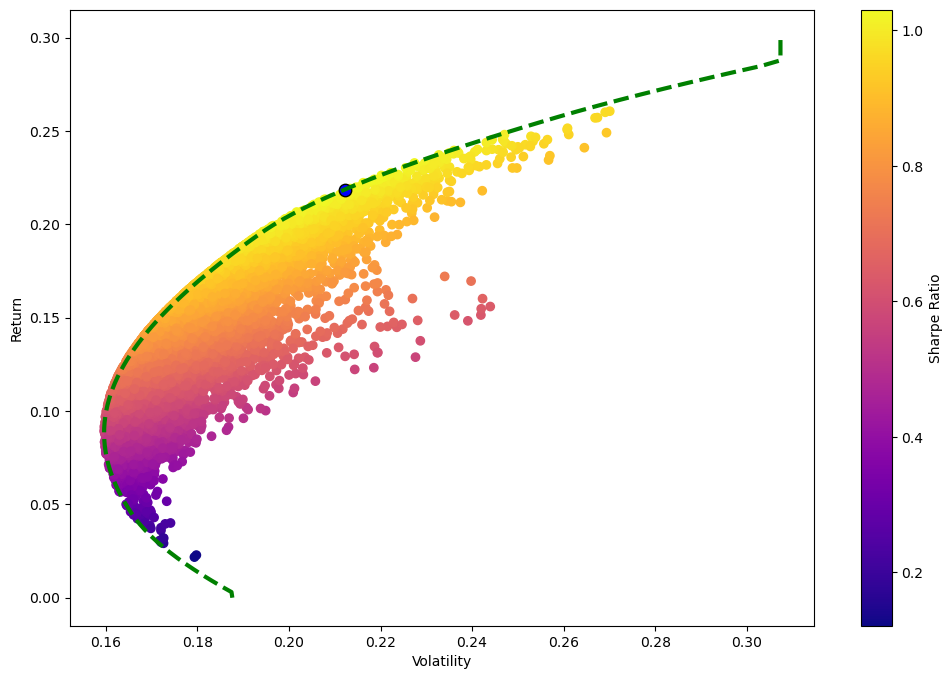

In [71]:
plt.figure(figsize=(12,8))
# Esses arrays vieram do Monte Carlo
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)
# Add red dot for max SR, pelo Monte Carlo
plt.scatter(max_sr_vol_MC,max_sr_ret_MC,c='blue',s=80,edgecolors='black')

In [72]:
result

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 0.3073592333553365
       x: [ 5.511e-17  5.527e-17  1.463e-13  1.000e+00]
     nit: 7
     jac: [ 6.177e-02  6.493e-02  4.860e-02  3.074e-01]
    nfev: 20
    njev: 3

In [73]:
# frontier_volatility contém os valores da volatilidade da fronteira+
frontier_volatility

[0.1876254669451045,
 0.18744450471194027,
 0.18525289121164162,
 0.18315180688220703,
 0.18113789096212057,
 0.17921408409807757,
 0.1773833245477195,
 0.1756485373329559,
 0.17401258503030562,
 0.1724781786216695,
 0.1710481436437216,
 0.1697251168336844,
 0.1685116173393039,
 0.16741002582121584,
 0.16642256355396945,
 0.16555052873821124,
 0.16475098389778872,
 0.1640073798074762,
 0.16331970172516574,
 0.16268871165342172,
 0.16211505383610939,
 0.16159933879990027,
 0.1611421229452583,
 0.16074390542701844,
 0.1604051257650196,
 0.1601261608188482,
 0.1599073240369603,
 0.15974886240290118,
 0.15965095568772242,
 0.1596137153278246,
 0.1596371837781125,
 0.1597213342772843,
 0.15986607100446004,
 0.16007122962213632,
 0.16033657819372138,
 0.16066181848667685,
 0.16104658762372268,
 0.16149046008519177,
 0.1619929500231494,
 0.1625535138392546,
 0.16317155303064215,
 0.16384826061012023,
 0.16457810737604397,
 0.1653638637602278,
 0.16620481776796261,
 0.16710008977990468,
 0.168

In [74]:
len(frontier_volatility)

100

In [75]:
frontier_y

array([0.        , 0.0030303 , 0.00606061, 0.00909091, 0.01212121,
       0.01515152, 0.01818182, 0.02121212, 0.02424242, 0.02727273,
       0.03030303, 0.03333333, 0.03636364, 0.03939394, 0.04242424,
       0.04545455, 0.04848485, 0.05151515, 0.05454545, 0.05757576,
       0.06060606, 0.06363636, 0.06666667, 0.06969697, 0.07272727,
       0.07575758, 0.07878788, 0.08181818, 0.08484848, 0.08787879,
       0.09090909, 0.09393939, 0.0969697 , 0.1       , 0.1030303 ,
       0.10606061, 0.10909091, 0.11212121, 0.11515152, 0.11818182,
       0.12121212, 0.12424242, 0.12727273, 0.13030303, 0.13333333,
       0.13636364, 0.13939394, 0.14242424, 0.14545455, 0.14848485,
       0.15151515, 0.15454545, 0.15757576, 0.16060606, 0.16363636,
       0.16666667, 0.16969697, 0.17272727, 0.17575758, 0.17878788,
       0.18181818, 0.18484848, 0.18787879, 0.19090909, 0.19393939,
       0.1969697 , 0.2       , 0.2030303 , 0.20606061, 0.20909091,
       0.21212121, 0.21515152, 0.21818182, 0.22121212, 0.22424

In [76]:
# Pesos iguais
weights = np.array([0.25,0.25,0.25,0.25])
# Expected Return
print('Expected Portfolio Return')
# fez o produto dos pesos pela média do retorno de cada acao, soma e multiplica pelo n. de dias 
#em uma ano
exp_ret = np.around(np.sum(log_ret.mean() * weights) *252,2)
print(exp_ret)
print('\n')

Expected Portfolio Return
0.14




In [77]:
# Expected Variance
print('Expected Volatility')
# raiz quadrada do produto dos pesos pelo log da covariancia
exp_vol = np.around(np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights))),2)
print(exp_vol)
print('\n')

Expected Volatility
0.17




In [78]:
# Sharpe Ratio
SR = np.around(exp_ret/exp_vol,2)
print('Sharpe Ratio')
print(SR)

Sharpe Ratio
0.82


In [79]:
# Ótimo: array([0.22, 0.21, 1.03])